## DSA4262 Individual Assignment 2 (Data Visualization + Predictive Modelling)

### **Importing Relevant Modules**
1. **Pandas** - For data cleaning and transformation
2. **Numpy** - For data manipulation
3. **Matplotlib** - For data visualization
4. **scikit-learn** - For Machine Learning
5. TBC

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Importing The Given Datasets**

There are two datasets that will used in this Predictive Modelling project. These include:

1. **dreaddit-train.csv**
2. **dreaddit-test.csv**

**NOTE:** These two files are in csv format and we will import the csv files directly (without chnaging to other possible formats such as excel(.xlsx)). We can directly import these two csv files using pandas `pd.read_csv` method.

#### **Importing Dataset 1 - Dreaddit Train (CSV File)**

In [75]:
dreaddit_train = pd.read_csv('dreaddit-train.csv')
dreaddit_train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


#### **Importing Dataset 2 - Dreaddit Test (CSV File)**

In [77]:
dreaddit_test = pd.read_csv('dreaddit-test.csv')
dreaddit_test.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


------------------------------------------------------------------------------------------------------------------------------------

### **Data Cleaning**

We will need to perform data cleaning from the raw data above (for both the training and test sets). The data cleaning methods will include (not exhaustive).

1) Removing unnecessary and irrelevant columns
2) Renaming columns to a more readable format
3) Standardizing the sentence range values (like removing inconsistencies [] vs (), number range)

#### **Data Cleaning - Dataset 1 (Dreaddit Train CSV File)**

Data Cleaning Step Required For Dataset 1:

*   Removing unnecessary columns
*   Renaming useful columns to more readable formats
*   Standardizing sentence range to fixed intervals

##### **Step 1: Removing Unnecessary Columns**

Before proceeding with the visualizations, it is important to note that the Dreaddit training and test datasets contain a large number of features (116 columns). Many of these variables are not directly relevant to our analysis. Including an excessive number of features in subsequent predictive modelling may increase model complexity, raise the risk of overfitting, and ultimately lead to poorer generalisation performance on the test set. Therefore, we perform a feature selection step to retain only the columns that are most relevant for exploratory analysis and model development.

However, a question that we should ask is which columns are considered important and which columns should we remove in order to reduce the number of columns as much as possible but still retain most of the important data for consideration? This is when we should explore each column one-by-one and determine whether the column is important.

**Important Columns Include:**

**Category 1: Core Metadata And Annotation Columns**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>subreddit</td>
        <td>Subcategory</td>
        <td>Identifies the community context in which a post is written, enabling analysis of how stress expression varies across different social environments. It is essential for subgroup performance analysis and domain-specific interpretation</td>
      </tr>
      <tr>
        <td>sentence_range</td>
        <td>Sentence Range</td>
        <td>Provides a coarse measure of post length and verbosity, which can reflect cognitive load or narrative stress. It is useful for analysing how stress correlates with the amount of text produced</td>
      </tr>
      <tr>
        <td>text</td>
        <td>Text</td>
        <td>Contains the raw linguistic content of each post, which is necessary for qualitative inspection, error analysis, and feature extraction. It enables direct interpretation of model predictions and failure cases</td>
      </tr>
      <tr>
        <td>label</td>
        <td>Label</td>
        <td>Represents the ground-truth stress annotation and serves as the target variable for supervised learning. It is required for both model training and performance evaluation</td>
      </tr>
      <tr>
        <td>confidence</td>
        <td>Confidence Level</td>
        <td>Indicates the annotators confidence in the assigned label, reflecting annotation reliability. This feature is useful for analysing ambiguous cases and understanding disagreement in stress perception</td>
      </tr>
  </tbody>
</table>

**Category 2: Sentiment And Social Context Features**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>sentiment</td>
        <td>Sentiment</td>
        <td>Captures the overall emotional polarity of a post, providing a high-level affective signal. It allows comparison between emotional tone and stress labels, highlighting cases where stress is expressed without overt negativity</td>
      </tr>
      <tr>
        <td>social_upvote_ratio</td>
        <td>Upvote Proportion</td>
        <td>Measures the proportion of positive community feedback received by a post, serving as a proxy for social approval. It helps analyse how stressed versus non-stressed posts are received by the community</td>
      </tr>
      <tr>
        <td>social_num_comments</td>
        <td>Number Of Comments</td>
        <td>Reflects the level of engagement a post generates, indicating social attention or concern. This feature provides contextual insight into how stress-related content elicits discussion</td>
      </tr>
  </tbody>
</table>

**Category 3: LIWC Affective Features**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_negemo</td>
        <td>Negative Emotional Language</td>
        <td>Measures the proportion of negative emotional language in a post. It is a strong and interpretable indicator of affective distress commonly associated with stress</td>
      </tr>
      <tr>
        <td>lex_liwc_anx</td>
        <td>Anxiety</td>
        <td>Captures anxiety-related language, which is closely linked to psychological stress. This feature is particularly relevant for detecting anticipatory worry and tension</td>
      </tr>
      <tr>
        <td>lex_liwc_sad</td>
        <td>Sadness</td>
        <td>Represents expressions of sadness, a frequent component of distress-related narratives. It helps distinguish emotionally heavy content from neutral discourse</td>
      </tr>
      <tr>
        <td>lex_liwc_anger</td>
        <td>Anger</td>
        <td>Measures expressions of frustration and anger, which often co-occur with stress. It is useful for identifying stress manifested through irritability rather than sadness</td>
      </tr>
  </tbody>
</table>

**Category 4: LIWC Cognitive Processing Features**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_cogproc</td>
        <td>Cognitive Processing</td>
        <td>Captures cognitive processing language associated with thinking, reasoning, and mental effort. Stress is often linked to rumination and overthinking, making this feature highly informative</td>
      </tr>
      <tr>
        <td>lex_liwc_insight</td>
        <td>Introspective Language</td>
        <td>Reflects introspective and self-reflective language. It is useful for identifying posts involving personal reflection, which often accompany stress narratives</td>
      </tr>
      <tr>
        <td>lex_liwc_cause</td>
        <td>Casual Reasoning Language</td>
        <td>Measures causal reasoning language, indicating attempts to explain or rationalise situations. Such reasoning is common in stressed individuals trying to make sense of difficulties</td>
      </tr>
      <tr>
        <td>lex_liwc_tentat</td>
        <td>Anger</td>
        <td>Measures tentative language, signalling uncertainty and lack of confidence. Stress frequently manifests as hesitation or indecision in language use</td>
      </tr>
      <tr>
        <td>lex_liwc_certain</td>
        <td>Certainty</td>
        <td>Represents expressions of certainty and conviction. It provides a useful contrast to tentative language, helping distinguish confident statements from uncertain, stress-related ones</td>
      </tr>
  </tbody>
</table>

**Category 5: LIWC Self-Focus**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_i</td>
        <td>Personal Pronouns</td>
        <td>Captures personal pronoun usage more broadly. It reflects how much a post is centred on personal experience versus external topics</td>
      </tr>
  </tbody>
</table>

**Category 6: LIWC Social And Situational Stressors**

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name In Dataset</th>
      <th>Revised Name</th>
      <th>Why Important?</th>
    </tr>
  </thead>
  <tbody>
      <tr>
        <td>lex_liwc_social</td>
        <td>Social Interactions</td>
        <td>Captures references to social interactions and relationships. Many stressors are interpersonal, making this feature valuable for contextual interpretation</td>
      </tr>
      <tr>
        <td>lex_liwc_family</td>
        <td>Family</td>
        <td>Measures family-related language, which often reflects emotionally salient stress sources. It is useful for identifying relational and caregiving stress</td>
      </tr>
      <tr>
        <td>lex_liwc_friend</td>
        <td>Friends</td>
        <td>Captures references to friendships and peer relationships. This feature supports analysis of social support and conflict in stress narratives</td>
      </tr>
      <tr>
        <td>lex_liwc_work</td>
        <td>Work</td>
        <td>Measures work-related language, a common source of chronic stress. It is particularly relevant for subreddits focused on employment or career issues.</td>
      </tr>
      <tr>
        <td>lex_liwc_money</td>
        <td>Money</td>
        <td>Captures financial language, reflecting economic pressure and insecurity. Financial stress is a major real-world stressor, making this feature highly interpretable.</td>
      </tr>
      <tr>
        <td>lex_liwc_achieve</td>
        <td>Achievement</td>
        <td>Measures achievement-oriented language related to goals and performance. It helps identify stress arising from pressure to succeed or meet expectation</td>
      </tr>
      <tr>
        <td>lex_liwc_risk</td>
        <td>Risk</td>
        <td>Captures language associated with danger and uncertainty. This feature is useful for identifying stress linked to perceived threats or instability</td>
      </tr>
  </tbody>
</table>

The other columns not listed in these categories are classified as not important or irrelevant for our visualization and modelling project, hence we will remove the other columns. We now have only **25 columns** instead of the initial 116 columns, while still keeping most of the important information that can be used for our predictive models.

In [82]:
# Extracting The Important Columns And Removing The Rest
dreaddit_train = dreaddit_train[['subreddit', 'sentence_range', 'text', 'label', 'confidence',
                                 'sentiment', 'social_upvote_ratio', 'social_num_comments',
                                 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_sad', 'lex_liwc_anger',
                                 'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_tentat',
                                 'lex_liwc_certain', 'lex_liwc_i', 'lex_liwc_social', 'lex_liwc_family',
                                 'lex_liwc_friend', 'lex_liwc_work', 'lex_liwc_money', 'lex_liwc_achieve',
                                 'lex_liwc_risk']]
dreaddit_train.head()

,subreddit,sentence_range,text,label,confidence,sentiment,social_upvote_ratio,social_num_comments,lex_liwc_negemo,lex_liwc_anx,...,lex_liwc_tentat,lex_liwc_certain,lex_liwc_i,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_work,lex_liwc_money,lex_liwc_achieve,lex_liwc_risk
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,-0.002742,0.86,1,6.90,0.86,...,5.17,0.00,9.48,3.45,0.00,0.00,0.86,0.00,1.72,2.59
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,0.292857,0.65,2,0.00,0.00,...,5.50,1.83,1.83,11.01,0.00,0.00,11.01,0.92,3.67,0.00
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,0.011894,0.67,0,1.20,0.00,...,2.99,0.00,8.98,15.57,0.60,3.59,0.00,0.00,0.60,0.00
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,0.141671,0.50,5,2.93,0.00,...,1.83,1.47,16.12,13.55,0.37,1.10,0.73,0.00,0.00,0.73
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,-0.204167,1.00,1,7.87,1.12,...,0.00,1.12,7.87,8.99,0.00,0.00,1.12,1.12,2.25,1.12


##### **Step 2: Renaming Columns To A More Readable Format**

Many of the columns names are still in unreadable formats like having underscores and names that do not make much sense. To keep all columns consistent, we will remove underscores and name all columns in camel case format (some columns are renamed to improve context and prevent confusion in the readers).

In [84]:
# Renaming All Columns For Consistency And Understandability
dreaddit_train.rename(columns = {'subreddit': 'Subcategory',
                                 'sentence_range': 'Sentence Range',
                                 'text': 'Text',
                                 'label': 'Label',
                                 'confidence': 'Confidence Level',
                                 'sentiment': 'Sentiment',
                                 'social_upvote_ratio': 'Upvote Proportion',
                                 'social_num_comments': 'Number Of Comments',
                                 'lex_liwc_negemo': 'Negative Emotional Language',
                                 'lex_liwc_anx': 'Anxiety',
                                 'lex_liwc_sad': 'Sadness',
                                 'lex_liwc_anger': 'Anger',
                                 'lex_liwc_cogproc': 'Cognitive Processing',
                                 'lex_liwc_insight': 'Introspective Language',
                                 'lex_liwc_cause': 'Casual Reasoning Language',
                                 'lex_liwc_tentat': 'Tentative Language',
                                 'lex_liwc_certain': 'Certainty',
                                 'lex_liwc_i': 'Personal Pronouns',
                                 'lex_liwc_social': 'Social Interactions',
                                 'lex_liwc_family': 'Family',
                                 'lex_liwc_friend': 'Friends',
                                 'lex_liwc_work': 'Work',
                                 'lex_liwc_money': 'Money',
                                 'lex_liwc_achieve': 'Achievement',
                                 'lex_liwc_risk': 'Risk'}, inplace = True)

dreaddit_train.head()

,Subcategory,Sentence Range,Text,Label,Confidence Level,Sentiment,Upvote Proportion,Number Of Comments,Negative Emotional Language,Anxiety,...,Tentative Language,Certainty,Personal Pronouns,Social Interactions,Family,Friends,Work,Money,Achievement,Risk
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,-0.002742,0.86,1,6.90,0.86,...,5.17,0.00,9.48,3.45,0.00,0.00,0.86,0.00,1.72,2.59
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,0.292857,0.65,2,0.00,0.00,...,5.50,1.83,1.83,11.01,0.00,0.00,11.01,0.92,3.67,0.00
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,0.011894,0.67,0,1.20,0.00,...,2.99,0.00,8.98,15.57,0.60,3.59,0.00,0.00,0.60,0.00
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,0.141671,0.50,5,2.93,0.00,...,1.83,1.47,16.12,13.55,0.37,1.10,0.73,0.00,0.00,0.73
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,-0.204167,1.00,1,7.87,1.12,...,0.00,1.12,7.87,8.99,0.00,0.00,1.12,1.12,2.25,1.12


##### **Step 3: Standardizing Sentence Range Column Values**

From the result obtained, we observe that the sentence range column values are not standardized and exist in different formats. Some ranges are enclosed in round brackets () while others are enclosed in square brackets []. Let's explore the distinct values of the Sentence Range column.

In [86]:
# Finding The Distinct Values Of Sentence Range Column
dreaddit_train['Sentence Range'].unique()

array(['(15, 20)', '(0, 5)', '[5, 10]', '[0, 5]', '(30, 35)', '[25, 30]',
       '(5, 10)', '(50, 55)', '[15, 20]', '[20, 25]', '(1, 6)', '(4, 9)',
       '(20, 25)', '[35, 40]', '[2, 7]', '(10, 15)', '[150, 155]',
       '[55, 60]', '(45, 50)', '(17, 22)', '[9, 14]', '(26, 31)',
       '[7, 12]', '[10, 15]', '[13, 18]', '(7, 12)', '[65, 70]',
       '[30, 35]', '[49, 54]', '[26, 31]', '(9, 14)', '[73, 78]',
       '[42, 47]', '(24, 29)', '(25, 30)', '(40, 45)', '[34, 39]',
       '[80, 85]', '[60, 65]', '[0, 4]', '(8, 13)', '[16, 21]',
       '[18, 23]', '(16, 21)', '[175, 180]', '(3, 8)', '(110, 115)',
       '(35, 40)', '[40, 45]', '[63, 68]', '(6, 11)', '[135, 140]',
       '(23, 28)', '(2, 7)', '[4, 9]', '(56, 61)', '(100, 105)',
       '(55, 60)', '[3, 8]', '[125, 130]', '(37, 42)', '[45, 50]',
       '[11, 16]', '[85, 90]', '[50, 55]', '(28, 33)', '[14, 19]',
       '[70, 75]', '[100, 105]', '(44, 49)', '[75, 80]', '(0, 4)',
       '(105, 110)', '(11, 16)', '(0, 3)', '(85, 90)',

We noticed that there are many different categories of sentence ranges. This might make it a problem for visualization subsequently as this will lead to too many categories for us to explore. We will standardize the sentence range column values to: 

1. **Very Short Text**: 1 to 10 sentences
2. **Short Text**: 11 to 20 sentences
3. **Medium Text**: 21 to 30 sentences
4. **Long Text**: 30 to 50 sentences 
5. **Very Long Text**: Over 50 sentences

**NOTE: This is just a possible classification of the texts and the number of sentences being classified as very short, short, medium, long and very long are subjective.** 

To classify each text properly, we will take the two numbers and calcualate the mean of the two values. If the mean of the two values exists as a decimal, we will round the number up to the nearest integer. For example, if the sentence has a length range of (32, 37), we will first find the mean value, which is (32 + 37) / 2 = 34.5. The value of 34.5 is a decimal number and hence, we will round up the value to 35. Based on the classification above, a text of 35 sentences is under **Long Text**. 

In [88]:
# Performing Standardization On Sentence Range Column Values
import math
import re

# Step 1: Function to extract numbers and compute the rounded-up mean sentence length
def compute_mean_sentence_length(range_str):
    numbers = list(map(int, re.findall(r'\d+', range_str)))
    mean_val = sum(numbers) / 2
    return math.ceil(mean_val)

In [89]:
# Step 2: Function to map mean length to categories
def categorize_text(mean_length):
    if 1 <= mean_length <= 10:
        return "Very Short Text"
    elif 11 <= mean_length <= 20:
        return "Short Text"
    elif 21 <= mean_length <= 30:
        return "Medium Text"
    elif 31 <= mean_length <= 50:
        return "Long Text"
    else:
        return "Very Long Text"

In [90]:
# Step 3: Apply to the dreaddit train dataset
dreaddit_train["Mean Sentence Length"] = (
    dreaddit_train["Sentence Range"]
    .apply(compute_mean_sentence_length))

dreaddit_train["Text Length"] = (
    dreaddit_train["Mean Sentence Length"]
    .apply(categorize_text))

# Remove the Mean Sentence Length And Sentence Range Columns
dreaddit_train.drop(columns=['Mean Sentence Length', 'Sentence Range'], inplace = True)

dreaddit_train.head()

,Subcategory,Text,Label,Confidence Level,Sentiment,Upvote Proportion,Number Of Comments,Negative Emotional Language,Anxiety,Sadness,...,Certainty,Personal Pronouns,Social Interactions,Family,Friends,Work,Money,Achievement,Risk,Text Length
0,ptsd,"He said he had not felt that way before, sugge...",1,0.8,-0.002742,0.86,1,6.90,0.86,3.45,...,0.00,9.48,3.45,0.00,0.00,0.86,0.00,1.72,2.59,Short Text
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.0,0.292857,0.65,2,0.00,0.00,0.00,...,1.83,1.83,11.01,0.00,0.00,11.01,0.92,3.67,0.00,Very Short Text
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.8,0.011894,0.67,0,1.20,0.00,0.00,...,0.00,8.98,15.57,0.60,3.59,0.00,0.00,0.60,0.00,Short Text
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.6,0.141671,0.50,5,2.93,0.00,0.73,...,1.47,16.12,13.55,0.37,1.10,0.73,0.00,0.00,0.73,Very Short Text
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.8,-0.204167,1.00,1,7.87,1.12,0.00,...,1.12,7.87,8.99,0.00,0.00,1.12,1.12,2.25,1.12,Very Short Text


For now, the dreaddit training dataset has been cleaned and we can now proceed to visualize some of the information. 

*   Important columns are preserved, redundant and irrelevant columns have been removed
*   Columns have been renamed to a more readable format
*   Sentence range has been standardized and grouped into 5 categories (very short text, short text, medium text, long text, very long text) for easier clasification and standardization

------------------------------------------------------------------------------------------------------------------------------------

### **Data Visualization**

We now proceed with a series of data visualizations to further explore the dataset and uncover meaningful patterns. Each visualization is accompanied by analytical commentary that offers possible explanations for the obeserved trends and anomalies.

#### **Visualization 1: Distribution Of Positive And Negative Stress Labels By Sub-Category**

This visualization examines the relationship between **Subcategory** (eg. PTSD, assistance, relationships) and **Label** (0  negative, 1 = positive indicator of stress)


**Step 1:** We begin by computing the total number of texts within each subcategory to understand the overall distribution of data across categories.

**Step 2:** Next, texts within each subcategory are disaggregated by their labels - positive (label = 1) and negative (label = 0), as well as the frequency of each label type is calculated. 

**Step 3:** To enable fairer comparisons across subcategories with differing sample sizes, the absolute counts are converted into percentages. This normalization ensures that subcategories with larger volumes of texts (eg. PTSD) do not disproportionately influence the interpretation relative to smaller subcategories (eg. assistance).

##### **Visualization 1 Part 1: Total Number Of Texts Within Each Subcategory**

Subcategories of the dreaddit train data include
1) ptsd
2) assistance
3) relationships
4) survivorsofabuse
5) domesticviolence
6) anxiety
7) homeless
8) stress
9) almosthomeless
10) food_pantry

In [93]:
# Obtaining The Unique Values Of The Subcategory Column
dreaddit_train['Subcategory'].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [94]:
# Step 1: Plotting Total Number Of Texts Within Each Subcategory

# Count number of texts per subcategory
subcategory_counts = dreaddit_train["Subcategory"].value_counts().sort_values(ascending=False)

# Rename subcategory labels
subcategory_rename_map = {"ptsd": "PTSD", "assistance": "Assistance", "relationships": "Relationships",
                          "survivorsofabuse": "Survivors Of Abuse", "domesticviolence": "Domestic Violence",
                          "anxiety": "Anxiety", "homeless": "Homeless", "stress": "Stress",
                          "almosthomeless": "Almost Homeless", "food_pantry": "Food Pantry"}

subcategory_counts.index = subcategory_counts.index.map(subcategory_rename_map)

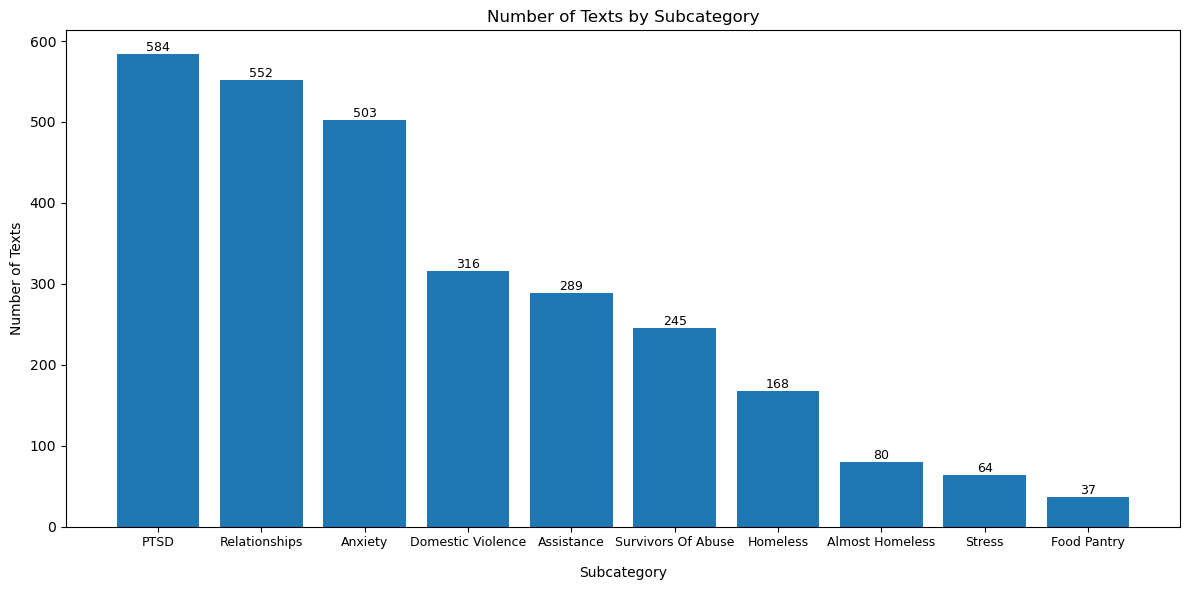

In [95]:
# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(subcategory_counts.index, subcategory_counts.values)

plt.title("Number of Texts by Subcategory")
plt.xlabel("Subcategory", labelpad = 12)
plt.ylabel("Number of Texts")
plt.xticks(fontsize=9)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}",
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

**Key Observations:** 

1) **PTSD** (584 texts), **Relationships** (552 texts) and **Anxiety** (503 texts) dominate the dataset. These three categories together account for nearly 60% of all texts in the training dataset, showing where most of the Reddit users concerns cluster. 

2) **Domestic Violence** (316 texts), **Assistance** (289 texts) and **Survivors Of Abuse** (245 texts) form a second tier. These represent serious social and safety issues, but with fewer texts compared to mental health concerns. 

3) Lower Frequency Categories include **Homeless** (168 texts), **Almost Homeless** (80 texts), **Stress** (64 texts) and **Food Pantry** (37 texts). They have much smaller number of texts and these categories highlight material needs and situational crisis. However, they are underrepresented in the dataset. 

**Possible Insights:**

*  The dataset is heavily skewed toward psychological struggles (PTSD, Anxiety, Relationships) rather than material hardships (Homelessness, Food Pantry). This suggests Dreaddit users are more lilely to seek support for emotional and relational issues than for logistical or survival needs. 

*  The prominance of Relationships and Anxiety reflects the Draeddit community's role as a space for interpersonal and emotional support. Meanwhile, the smaller counts for Homelessness and Food Pantry suggest fewer users turn to Reddit for material aid compared to emotional support. 


##### **Visualization 1 Part 2: Number Of Positive And Negative Label Texts By Subcategory**

The initial plot provides an overview of how texts are distributed across subcategories, but it does not convery any information about the nature or severity of stress expressed within those texts. A subcategory with a large number of posts may not necessarily indicate a higher prevalence of depressive indicators, it may simply reflect higher engagement or posting activity within that topic. 

Therefore, in the next visualization, the texts within each subcategory are further disagregated by their labels - positive (label = 1) and negative (label = 0) and the frequency of each label type is calculated. This deeper breakdown allows us to distinguish between subcategories that predominantly contain expressions of stress and those that do not, providing more meaningful insights into the emotional content of each subcategory rather than relying solely on volume-based comparisons.


In [97]:
# Step 2: Plotting Number Of Positive And Negative Texts Within Each Subcategory

# Count positive and negative labels per subcategory
label_counts = dreaddit_train.groupby('Subcategory')['Label'].value_counts().unstack(fill_value=0)

# Rename subcategory labels
subcategory_rename_map = {"ptsd": "PTSD", "assistance": "Assistance", "relationships": "Relationships",
                          "survivorsofabuse": "Survivors Of Abuse", "domesticviolence": "Domestic Violence",
                          "anxiety": "Anxiety", "homeless": "Homeless", "stress": "Stress",
                          "almosthomeless": "Almost Homeless", "food_pantry": "Food Pantry"}

label_counts.index = label_counts.index.map(subcategory_rename_map)

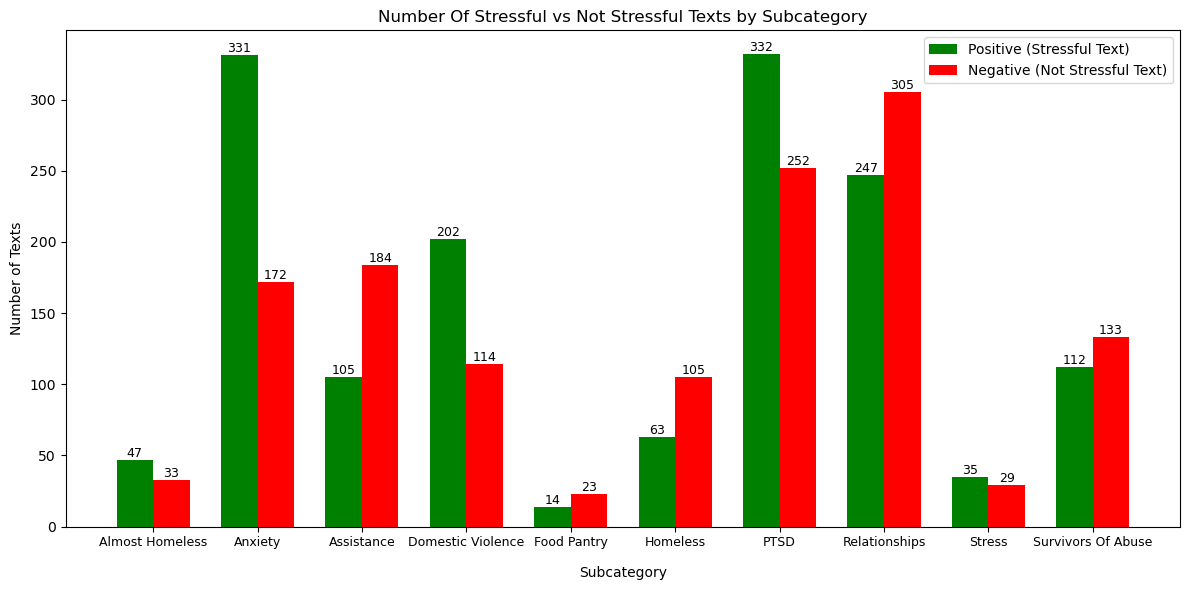

In [98]:
# Prepare bar positions for grouped bar chart
subcategories = label_counts.index
x = np.arange(len(subcategories)) 
width = 0.35

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars_positive = ax.bar(x - width/2, label_counts.get(1, 0), width, label='Positive (Stressful Text)', color='green')
bars_negative = ax.bar(x + width/2, label_counts.get(0, 0), width, label='Negative (Not Stressful Text)', color='red')

# Add labels, titles, and ticks
ax.set_xlabel('Subcategory', labelpad=12)
ax.set_ylabel('Number of Texts')
ax.set_title('Number Of Stressful vs Not Stressful Texts by Subcategory')
ax.set_xticks(x)
ax.set_xticklabels(subcategories, fontsize=9)
ax.legend()

# Add value labels above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

add_labels(bars_positive)
add_labels(bars_negative)
plt.tight_layout()
plt.show()

**Key Observations:**

1) **High Stress Categories** - This includes **Anxiety** (331 stressful vs 172 non-stressful) and **PTSD** (332 stressful vs 252 non-stressful). These categories show a clear majority of stressful texts. **Domestic Violence** (202 stressful vs 114 non-stressul) also highly skews towards stressful. These categories are strongly associated with emotional distress, aligning with clinical and social severity. 

2) **Low Stress Categories** - **Relationships** (247 stressful vs 305 non-stressful) has more non-stressful texts, suggesting that not all relationship-related posts are framed as crises - many may be just seeking advice. **Assistance** (105 stressful vs 184 non-stressful) also leans toward non-stressful, indicating that requests for help may often be practical rather than emotionally charged. 

3) **Balanced Categories** - **Stress** (35 stressful vs 29 non-stressful) and **Survivors Of Abuse** (112 stressful vs 133 non-stressful) are relatively balanced, showing that these topics can generate both stressful and non-stressful narratives depending on context. 

4) **Material Need Categories** - **Homeless** (63 stressful vs 105 non-stressful) and **Food Pantry** (14 stressful vs 23 non-stressful) show more non-stressful texts. This suggests that logistical or resource-based posts may be framed less as emotional distress and more as informational or community support. 

##### **Visualization 1 Part 3: Percentage Of Positive And Negative Label Texts By Subcategory**

The previous visualization provides a useful breakdown of positive and negative labels within each subcategory, but using absolute counts alone can be misleading when comparing subcategories of vastly different sizes. For example, a subcategory like PTSD may have hundreds of texts while a subcategory like Food Pantry may only have a few dozen. Even if both subcategories have a similar proportion of positive labels, the raw counts would suggest that PTSD is overwhelmingly more "stressful" than Food Pantry, which is not necessarily true.

To address this imbalance, the next visualization is employed to convert the counts into percentages relative to the total number of texts in each subcategory. This normalization allows for a fairer comparison, highlighting the proportion of postitive and negative labels within each subcategory rather than the raw volume. By using percentages, we can accurately interpret trends across subcategories regardless of their sample size, ensuring that similar subcategories are not undervalued or overshadowed by larger ones. 

In [100]:
# Step 3: Plotting Percentage Of Positive And Negative Texts Within Each Subcategory

# Calculate counts and convert to percentages
label_counts = dreaddit_train.groupby('Subcategory')['Label'].value_counts().unstack(fill_value=0)

# Rename subcategories
subcategory_rename_map = {"ptsd": "PTSD", "assistance": "Assistance", "relationships": "Relationships",
                          "survivorsofabuse": "Survivors Of Abuse", "domesticviolence": "Domestic Violence",
                          "anxiety": "Anxiety", "homeless": "Homeless", "stress": "Stress",
                          "almosthomeless": "Almost Homeless", "food_pantry": "Food Pantry"}
label_counts.index = label_counts.index.map(subcategory_rename_map)

# Convert counts to percentages per subcategory
label_percent = label_counts.div(label_counts.sum(axis=1), axis=0) * 100

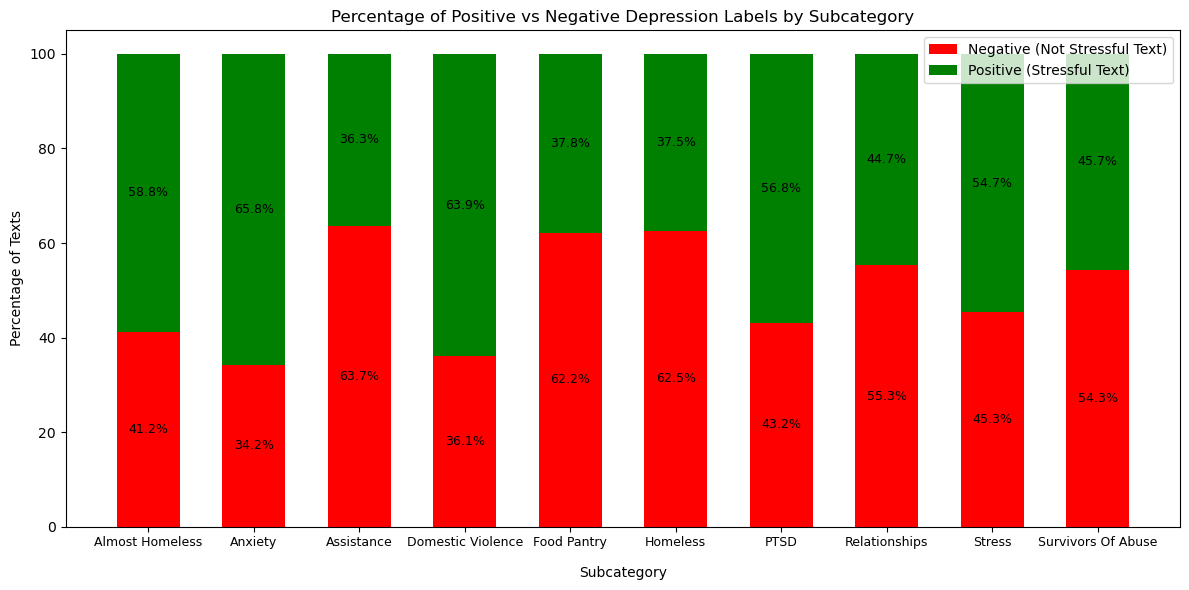

In [101]:
# Plot stacked bar chart (percentage)
subcategories = label_percent.index
x = np.arange(len(subcategories))
width = 0.6
fig, ax = plt.subplots(figsize=(12, 6))

# Plot negative first (red), then positive (green)
bars_negative = ax.bar(x, label_percent.get(0, 0), width, color='red', label='Negative (Not Stressful Text)')
bars_positive = ax.bar(x, label_percent.get(1, 0), width, bottom=label_percent.get(0, 0), color='green', label='Positive (Stressful Text)')

# Add value labels inside each bar
for i in range(len(subcategories)):
    neg_height = label_percent.get(0, 0).iloc[i]
    pos_height = label_percent.get(1, 0).iloc[i]
    
    # Negative label inside the bar
    if neg_height > 0:
        ax.text(x[i], neg_height/2, f'{neg_height:.1f}%', ha='center', va='center', color='black', fontsize=9)
    
    # Positive label inside the bar
    if pos_height > 0:
        ax.text(x[i], neg_height + pos_height/2, f'{pos_height:.1f}%', ha='center', va='center', color='black', fontsize=9)

# Customize axes, title, legend
ax.set_xlabel('Subcategory', labelpad=12)
ax.set_ylabel('Percentage of Texts')
ax.set_title('Percentage of Positive vs Negative Depression Labels by Subcategory')
ax.set_xticks(x)
ax.set_xticklabels(subcategories, fontsize=9)
ax.legend()
plt.tight_layout()
plt.show()

**Key Observations:**

1) **High-Stress Categories** (Majority Stressful) 

*   **Anxiety**: 65.8% stressful, 34.2% not stressful
*   **Domestic Violence**: 63.9% stressful, 36.1% not stressful
*   **Almost Homeless**: 58.8% stressful, 41.2% not stressful
*   **PTSD**: 56.8% stressful, 43.2% not stressful

2) **Low-Stress Categories** (Majority Not Stressful)

*   **Assistance**: 63.7% non-stressful, 36.3% stressful
*   **Food Pantry**: 62.2% non-stressful, 37.8% stressful
*   **Homeless**: 62.5% non-stressful, 37.5% stressful (These are probably more practical/resource-oriented, with users often framing them as logistical rather than emotional crisis)

3) **Balanced/Mized Categories** 

*   **Relationships**: 55.3% non-stressful, 44.7% stressful
*   **Survivors Of Abuse**: 54.3% non-stressful vs 45.7% stressful (These sit near the middle, showing that experiences in these areas can be noth stressful and reflective/advisory)

**Possible Insights:**

*  Although in raw counts, **PTSD** and **Anxiety** looked dominant, but percentages show that **Domestic Violence** and **Almost Homeless** are equally or more skewed toward stressful texts. This highlights categories where distress is proportionally higher even if total volume is lower. 

*  **Relationships** is a complex category. Despite being one of the largest categories, relationships still tilts slightly towards non-stressful (55.3%), showing that not all interpersonal posts are crisis-driven, many may be just seeking advice or reflective ones.